In [509]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [510]:
df = pd.read_csv("./extracted_files/contest_results.csv", parse_dates=["contest_date"])
df.loc[df['division'] == 'women\'s wellness', 'division'] = 'wellness'

In [512]:
div_groupby = df[(df["contest_name"] == "ifbb mr olympia")
                 & (df["class"] == "open")].groupby(
    ["contest_date", "division"]
)

In [513]:
df_olympia_cnt = pd.DataFrame(div_groupby["competitor_name"].count()).reset_index()

In [514]:
df_olympia_cnt.head()

,contest_date,division,competitor_name
0,2014-09-18,212,14
1,2014-09-18,bikini,26
2,2014-09-18,figure,20
3,2014-09-18,fitness,12
4,2014-09-18,men's bodybuilding,17


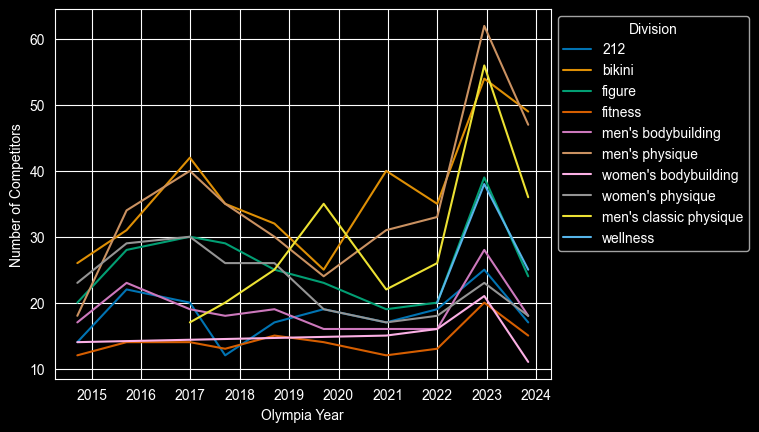

In [515]:
ax = sns.lineplot(
    data=df_olympia_cnt,
    x="contest_date",
    y="competitor_name",
    hue="division",
    palette="colorblind"
)
plt.xlabel("Olympia Year")
plt.ylabel("Number of Competitors")
plt.legend(title="Division")
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
plt.style.use("dark_background")

In [516]:
df_elo = pd.read_csv("contest_results_elo_adjusted.csv",
                     parse_dates=["contest_date"])

In [517]:
df_elo["year"] = df_elo["contest_date"].dt.year

In [523]:
df_elo_olymp = df_elo[(df_elo["contest_name"] == "ifbb mr olympia")
                      & (df_elo["year"] == 2023)
                      & (df_elo["class"] == "open")
                      & (df_elo["division"]== "bikini")]

Text(0.5, 1.0, '2023 Ms. Olympia Bikini Elo Rating Distribution')

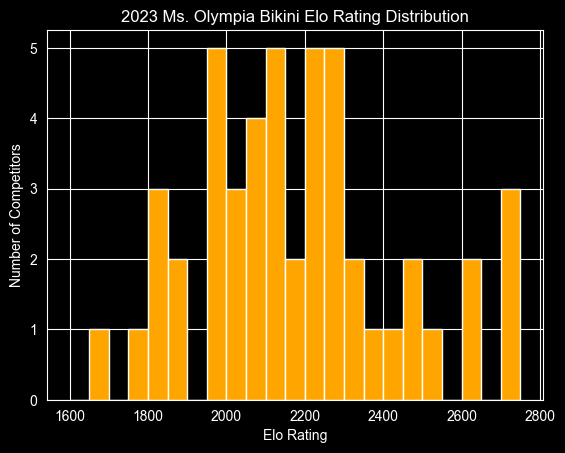

In [524]:
plt.hist(df_elo_olymp["elo_rating"],
         bins = range(1600, 2800, 50),
         color="orange")
plt.style.use("dark_background")
plt.xlabel("Elo Rating")
plt.ylabel("Number of Competitors")
plt.title("2023 Ms. Olympia Bikini Elo Rating Distribution")


In [526]:
df_elo_olymp.sort_values(by=["placing"], ascending=True).head(15)["elo_rating"].min()

2109.325765034716

In [535]:
df_elo.loc[df_elo["elo_rank"] > 16, "elo_rank"] = 16

In [536]:
df_2223 = df_elo[(df_elo["year"] >= 2022)
                    & (df_elo["organization"] == "ifbb")
                    & (df_elo["class"] == "open")]

In [537]:
df_2223['last_name'] = df_2223['competitor_name'].str.split().str[-1]

/var/folders/0s/9k5wnkxx22l_g6lmt5xw673m0000gq/T/ipykernel_41847/771269885.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2223['last_name'] = df_2223['competitor_name'].str.split().str[-1]


In [538]:
def assign_alphabetical_order(group):
    group['alphabetical_order'] = range(1, len(group) + 1)
    return group

In [539]:
df_2223 = df_2223.sort_values(by=["last_name"])
df_sorted = df_2223.groupby(by=["division", "contest_date", "contest_name"]).apply(assign_alphabetical_order)

/var/folders/0s/9k5wnkxx22l_g6lmt5xw673m0000gq/T/ipykernel_41847/1272384429.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_sorted = df_2223.groupby(by=["division", "contest_date", "contest_name"]).apply(assign_alphabetical_order)


In [541]:
df_sorted.head(10)

Unnamed: 0 organization  \
division contest_date contest_name                                        
212      2022-03-28   ifbb thailand pro 548408       61769         ifbb   
                                        548410       61772         ifbb   
                                        548409       61773         ifbb   
                                        548411       61771         ifbb   
                                        548412       61770         ifbb   
                                        548413       61774         ifbb   
         2022-05-14   ifbb indy pro     563038       62350         ifbb   
                                        563028       62347         ifbb   
                                        563033       62351         ifbb   
                                        563039       62342         ifbb   

                                                     contest_name  \
division contest_date contest_name                                  
212      2022-03-28   ifbb thailand pro 548408  ifbb thailand pro   
                                        548410  ifbb thailand pro   
                                        548409  ifbb thailand pro   
                                        548411  ifbb thailand pro   
                                        548412  ifbb thailand pro   
                                        548413  ifbb thailand pro   
         2022-05-14   ifbb indy pro     563038      ifbb indy pro   
                                        563028      ifbb indy pro   
                                        563033      ifbb indy pro   
                                        563039      ifbb indy pro   

                                               contest_date division class  \
division contest_date contest_name                                           
212      2022-03-28   ifbb thailand pro 548408   2022-03-28      212  open   
                                        548410   2022-03-28      212  open   
                                        548409   2022-03-28      212  open   
                                        548411   2022-03-28      212  open   
                                        548412   2022-03-28      212  open   
                                        548413   2022-03-28      212  open   
         2022-05-14   ifbb indy pro     563038   2022-05-14      212  open   
                                        563028   2022-05-14      212  open   
                                        563033   2022-05-14      212  open   
                                        563039   2022-05-14      212  open   

                                                     competitor_name  placing  \
division contest_date contest_name                                              
212      2022-03-28   ifbb thailand pro 548408  abdul aziz almershdi      6.0   
                                        548410       lin ching-chieh      3.0   
                                        548409    hamed mahmoud eini      2.0   
                                        548411         naser mohamed      4.0   
                                        548412       richard morilla      5.0   
                                        548413           yunlong pin      1.0   
         2022-05-14   ifbb indy pro     563038            noel adame      2.0   
                                        563028       abdullah alsaif      5.0   
                                        563033         bryan balzano      1.0   
                                        563039        peter castella     10.0   

                                                 elo_rating  elo_rank  year  \
division contest_date contest_name                                            
212      2022-03-28   ifbb thailand pro 548408  1651.000000       2.0  2022   
                                        548410  1651.000000       4.0  2022   
                                        548409  1651.000000       3.0  2022   
             

In [542]:
from scipy.stats import kendalltau

In [543]:
rows_list = []
for div in df_sorted["division"].unique():
    df_div = df_sorted[df_sorted['division'] == div]
    for dt in df["contest_date"].unique():
        df_dt = df_div[df_div["contest_date"] == dt]
        kt_corr_elo = []
        kt_corr_alpha = []
        for ctst in df_dt["contest_name"].unique():
            temp_df = df_dt[df_dt["contest_name"] == ctst]
            temp_df = temp_df.dropna()
            if len(temp_df) < 2:
                continue
            y_true = temp_df["placing"]
            y_predict_elo = temp_df["elo_rank"]
            y_predict_alpha = temp_df["alphabetical_order"]
            kt_corr_elo.append(kendalltau(y_true, y_predict_elo).statistic)
            kt_corr_alpha.append(kendalltau(y_true, y_predict_alpha).statistic)
        if kt_corr_alpha:
            rows_list.append(
                {
                    "date": dt,
                    "division": div,
                    "kt_corr_alpha": sum(kt_corr_alpha) / len(kt_corr_alpha),
                    "kt_corr_elo": sum(kt_corr_elo) / len(kt_corr_elo)
                }
            )

In [544]:
df_kt = pd.DataFrame(rows_list)
df_kt[f'30dayrollavg_kt_corr_alpha'] = df_kt["kt_corr_alpha"].transform(lambda x: x.rolling(30, 1).mean())
df_kt[f'30dayrollavg_kt_corr_elo'] = df_kt["kt_corr_elo"].transform(lambda x: x.rolling(30, 1).mean())

In [545]:
df_kt = df_kt[["date", "division", "30dayrollavg_kt_corr_elo", "30dayrollavg_kt_corr_alpha"]]

In [546]:
df_kt.head()

,date,division,30dayrollavg_kt_corr_elo,30dayrollavg_kt_corr_alpha
0,2022-06-05,212,0.333333,0.333333
1,2023-05-20,212,0.220833,0.187500
2,2023-07-09,212,0.298737,0.135101
3,2023-09-30,212,0.385164,0.117992
4,2023-11-12,212,0.333326,0.133355


In [547]:
df_kt = pd.melt(df_kt, id_vars=['date', 'division'], var_name='Method', value_name='Kendall Tau Correlation').replace(to_replace={"30dayrollavg_kt_corr_elo": "Elo Rating",
                                                                                                                      "30dayrollavg_kt_corr_alpha": "Alphabetical Rating"})

In [548]:
df_kt.head()

,date,division,Method,Kendall Tau Correlation
0,2022-06-05,212,Elo Rating,0.333333
1,2023-05-20,212,Elo Rating,0.220833
2,2023-07-09,212,Elo Rating,0.298737
3,2023-09-30,212,Elo Rating,0.385164
4,2023-11-12,212,Elo Rating,0.333326


In [549]:
df_kt = pd.DataFrame(df_kt.groupby(["date", "Method"])["Kendall Tau Correlation"].mean()).reset_index()

In [550]:
df_kt.head()

,date,Method,Kendall Tau Correlation
0,2022-02-05,Alphabetical Rating,0.033890
1,2022-02-05,Elo Rating,0.516661
2,2022-03-04,Alphabetical Rating,0.011925
3,2022-03-04,Elo Rating,0.459970
4,2022-03-12,Alphabetical Rating,0.015631


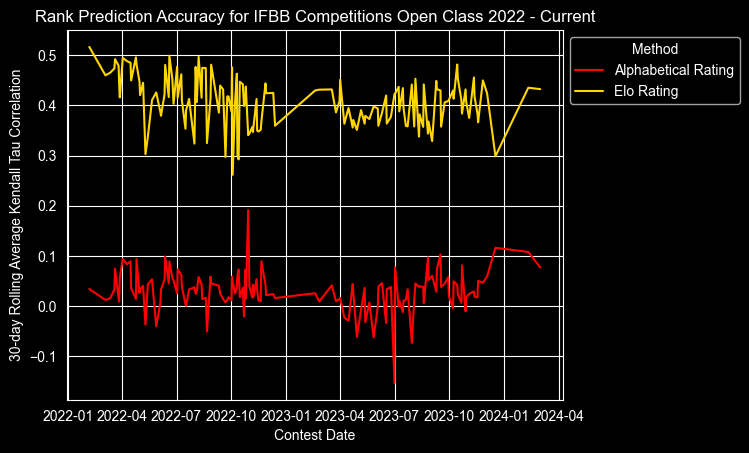

In [551]:
rg_palette = ["red", "gold"]
sns.set_palette(rg_palette)
ax = sns.lineplot(
    data=df_kt,
    x="date",
    y="Kendall Tau Correlation",
    hue="Method"
)
plt.xlabel("Contest Date")
plt.ylabel("30-day Rolling Average Kendall Tau Correlation")
plt.title("Rank Prediction Accuracy for IFBB Competitions Open Class 2022 - Current")
# plt.ylim(0, 0.8)
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))

In [564]:
df_elo[df_elo["contest_name"] == "ifbb mr olympia"]["contest_date"]

58638    2014-09-18
58639    2014-09-18
58640    2014-09-18
58641    2014-09-18
58642    2014-09-18
            ...    
736750   2023-11-03
736751   2023-11-03
736752   2023-11-03
736753   2023-11-03
736754   2023-11-03
Name: contest_date, Length: 2152, dtype: datetime64[ns]

In [565]:
df_23 = df_elo[(df_elo["year"] == 2023)
               & (df_elo["contest_date"] <= '2023-11-03')
               & (df_elo["organization"] == "ifbb")
               & (df_elo["class"] == "open")]
df_rec_elos = df_23.sort_values(by=["competitor_name", "contest_date"]).groupby("competitor_name").last()
df_rec_elos = pd.DataFrame(df_rec_elos).reset_index()

<Axes: xlabel='elo_rating', ylabel='Count'>

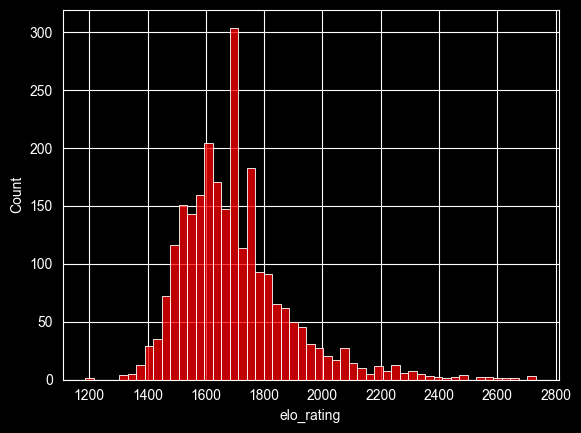

In [566]:
sns.histplot(df_rec_elos["elo_rating"])

In [574]:
df_bik_olymp_elos = df_rec_elos[(df_rec_elos["contest_name"] == "ifbb mr olympia")
                                & (df_rec_elos["division"] == "bikini")]

Text(0.5, 1.0, 'Elo Rating Distribution of 2023 Ms. Olympia Bikini Competitors')

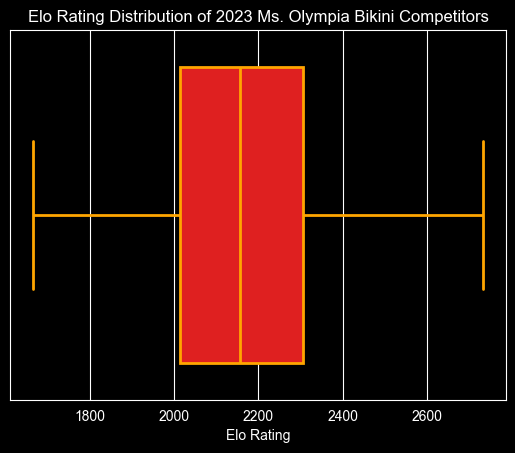

In [575]:
ax = sns.boxplot(x=df_bik_olymp_elos["elo_rating"],
                 fill=True,
                 color="red",
                 linecolor="orange",
                 linewidth=2)
plt.xlabel("Elo Rating")
plt.title("Elo Rating Distribution of 2023 Ms. Olympia Bikini Competitors")

In [576]:
df_bik_olymp_elos["elo_rating"].quantile([0.25,0.5,0.75])

0.25    2014.809936
0.50    2156.460743
0.75    2304.543098
Name: elo_rating, dtype: float64

In [577]:
low_rank_names = df_bik_olymp_elos[df_bik_olymp_elos["elo_rating"] < 2014.8]["competitor_name"].unique()

In [578]:
low_rank_names

array(['amanda marques', 'areum song', 'brenda farias', 'dahye jeon',
       'eszter ozcella', 'hyo jung kim', 'jibin park',
       'jil meret schmitz', 'ottavia mazza', 'reyna perez mecalco',
       'roxana marquez', 'zsofia reka molnar'], dtype=object)

In [579]:
df_bik_olymp_elos[df_bik_olymp_elos["competitor_name"].isin(low_rank_names)]

,competitor_name,Unnamed: 0,organization,contest_name,contest_date,division,class,placing,elo_rating,elo_rank,year
114,amanda marques,73481,ifbb,ifbb mr olympia,2023-11-03,bikini,open,16.0,1827.147500,16.0,2023
212,areum song,73482,ifbb,ifbb mr olympia,2023-11-03,bikini,open,16.0,1872.322121,16.0,2023
293,brenda farias,73483,ifbb,ifbb mr olympia,2023-11-03,bikini,open,16.0,1827.425269,16.0,2023
495,dahye jeon,73484,ifbb,ifbb mr olympia,2023-11-03,bikini,open,16.0,1874.926811,16.0,2023
723,eszter ozcella,73486,ifbb,ifbb mr olympia,2023-11-03,bikini,open,16.0,1767.000000,16.0,2023
907,hyo jung kim,73488,ifbb,ifbb mr olympia,2023-11-03,bikini,open,16.0,1805.618492,16.0,2023
1082,jibin park,73493,ifbb,ifbb mr olympia,2023-11-03,bikini,open,16.0,1957.102287,16.0,2023
1086,jil meret schmitz,73494,ifbb,ifbb mr olympia,2023-11-03,bikini,open,16.0,1664.984723,16.0,2023
1856,ottavia mazza,73502,ifbb,ifbb mr olympia,2023-11-03,bikini,open,16.0,1982.849729,16.0,2023
1989,reyna perez mecalco,73503,ifbb,ifbb mr olympia,2023-11-03,bikini,open,16.0,1972.981092,16.0,2023


In [580]:
df_elo[(df_elo["competitor_name"].isin(low_rank_names))
       & (df_elo["organization"] == "ifbb")
       & (df_elo["placing"] == 1)
       & (df_elo["year"] >= 2021)].sort_values("contest_date")

,Unnamed: 0,organization,contest_name,contest_date,division,class,competitor_name,placing,elo_rating,elo_rank,year
507090,58850,ifbb,ifbb monsterzym pro,2021-09-12,bikini,open,jibin park,1.0,1520.378714,6.0,2021
510140,59077,ifbb,ifbb san antonio pro,2021-09-25,bikini,open,roxana marquez,1.0,1794.857909,10.0,2021
510516,59162,ifbb,ifbb tsunami cup pro,2021-09-27,bikini,open,ottavia mazza,1.0,1882.075131,1.0,2021
548416,61781,ifbb,ifbb thailand pro,2022-03-28,bikini,open,jil meret schmitz,1.0,1508.941547,7.0,2022
630151,66698,ifbb,ifbb mexico grand battle pro,2022-10-24,bikini,open,reyna perez mecalco,1.0,1767.000000,8.0,2022
647853,67847,ifbb,ifbb taiwan pro,2022-11-28,bikini,open,jibin park,1.0,1597.003601,6.0,2022
654366,68324,ifbb,ifbb musclecontest campinas pro,2023-03-18,bikini,open,brenda farias,1.0,1767.000000,3.0,2023
660335,68482,ifbb,ifbb agp south korea pro,2023-04-15,bikini,open,hyo jung kim,1.0,1776.507030,1.0,2023
670683,69038,ifbb,ifbb tropicarium budapest pro,2023-05-13,bikini,open,zsofia reka molnar,1.0,1842.623853,5.0,2023
686843,69953,ifbb,ifbb sheru classic india pro,2023-06-18,bikini,open,jil meret schmitz,1.0,1585.654353,8.0,2023


In [581]:
high_rank_names = df_bik_olymp_elos[(df_bik_olymp_elos["division"] == "bikini")
            & (df_bik_olymp_elos["elo_rating"] > 2304.5)]["competitor_name"].unique()

In [583]:
df_bik_olymp_elos[df_bik_olymp_elos["competitor_name"].isin(high_rank_names)].sort_values("placing")

,competitor_name,Unnamed: 0,organization,contest_name,contest_date,division,class,placing,elo_rating,elo_rank,year
1028,jennifer dorie,73527,ifbb,ifbb mr olympia,2023-11-03,bikini,open,1.0,2732.674575,1.0,2023
1626,maureen blanquisco,73526,ifbb,ifbb mr olympia,2023-11-03,bikini,open,2.0,2639.491939,4.0,2023
231,ashley kaltwasser,73525,ifbb,ifbb mr olympia,2023-11-03,bikini,open,3.0,2707.602024,3.0,2023
1397,lauralie chapados,73524,ifbb,ifbb mr olympia,2023-11-03,bikini,open,4.0,2707.872765,2.0,2023
665,elisa pecini,73523,ifbb,ifbb mr olympia,2023-11-03,bikini,open,5.0,2615.212892,5.0,2023
37,aimee leann delgado,73522,ifbb,ifbb mr olympia,2023-11-03,bikini,open,6.0,2491.275470,7.0,2023
234,ashlyn little,73520,ifbb,ifbb mr olympia,2023-11-03,bikini,open,8.0,2322.838936,12.0,2023
537,daraja hill,73519,ifbb,ifbb mr olympia,2023-11-03,bikini,open,9.0,2541.926683,6.0,2023
1179,jourdanne lee,73518,ifbb,ifbb mr olympia,2023-11-03,bikini,open,10.0,2408.333596,9.0,2023
1909,phoebe hagan,73517,ifbb,ifbb mr olympia,2023-11-03,bikini,open,11.0,2365.931006,10.0,2023


In [584]:
df_elo[(df_elo["competitor_name"].isin(high_rank_names))
       & (df_elo["organization"] == "ifbb")
       & (df_elo["placing"] == 1)
       & (df_elo["year"] >= 2022)].sort_values("contest_date")

,Unnamed: 0,organization,contest_name,contest_date,division,class,competitor_name,placing,elo_rating,elo_rank,year
546440,61558,ifbb,ifbb legends pro,2022-02-05,bikini,open,ashley kaltwasser,1.0,2618.076081,1.0,2022
547052,61568,ifbb,arnold sports festival,2022-03-04,bikini,open,lauralie chapados,1.0,2640.710544,2.0,2022
547124,61637,ifbb,ifbb boston pro,2022-03-12,bikini,open,maureen blanquisco,1.0,2493.461848,2.0,2022
549980,61829,ifbb,ifbb world klash pro,2022-04-02,bikini,open,ashlyn little,1.0,2327.440072,1.0,2022
551916,61852,ifbb,ifbb golden state pro,2022-04-09,bikini,open,ashley kaltwasser,1.0,2622.075993,1.0,2022
553340,61929,ifbb,ifbb charlotte pro,2022-04-15,bikini,open,ashlyn little,1.0,2350.556408,1.0,2022
553626,62014,ifbb,ifbb wasatch warrior pro,2022-04-16,bikini,open,ashley kaltwasser,1.0,2626.814507,1.0,2022
557939,62151,ifbb,ifbb grl pwr pro,2022-04-30,bikini,open,ashlyn little,1.0,2381.854745,1.0,2022
560493,62196,ifbb,ifbb pittsburgh pro,2022-05-06,bikini,open,lauralie chapados,1.0,2660.145581,2.0,2022
564686,62424,ifbb,ifbb new york pro,2022-05-21,bikini,open,lauralie chapados,1.0,2681.468993,2.0,2022


In [592]:
df.head()

,contest_url,competitor_name,competitor_url,organization,contest_name,contest_date,division,class,placing,scraped_timestamp,is_loaded
0,https://contests.npcnewsonline.com/contests/20...,laura mcintosh,https://contests.npcnewsonline.com/contests/20...,cpa,cpa fedel clarke classic,2018-03-25,bikini,class a,6.0,2023-11-07 03:47:46.494501 UTC,False
1,https://contests.npcnewsonline.com/contests/20...,tasha chase,https://contests.npcnewsonline.com/contests/20...,cpa,cpa fedel clarke classic,2018-03-25,bikini,class a,5.0,2023-11-07 03:47:46.494 UTC,False
2,https://contests.npcnewsonline.com/contests/20...,sarah farrer,https://contests.npcnewsonline.com/contests/20...,cpa,cpa fedel clarke classic,2018-03-25,bikini,class a,4.0,2023-11-07 03:47:46.493408 UTC,False
3,https://contests.npcnewsonline.com/contests/20...,neha dhanda,https://contests.npcnewsonline.com/contests/20...,cpa,cpa fedel clarke classic,2018-03-25,bikini,class a,3.0,2023-11-07 03:47:46.492877 UTC,False
4,https://contests.npcnewsonline.com/contests/20...,reina espineli,https://contests.npcnewsonline.com/contests/20...,cpa,cpa fedel clarke classic,2018-03-25,bikini,class a,2.0,2023-11-07 03:47:46.492311 UTC,False


In [593]:
df_sub = df[["contest_date","competitor_name", "division", "class"]]

In [613]:
df_am = pd.merge(df_elo[["contest_date","competitor_name", "division", "class", "elo_rating", "elo_rank"]], df_sub[df_sub["class"].str.contains("pro card")],
         how="inner", on=["contest_date","competitor_name", "division"]).drop_duplicates()

In [616]:
df_am["year"] = df_am["contest_date"].dt.year

Text(0.5, 1.0, 'Elo Rating Prediction of Bikini IFBB Pro Card Winners')

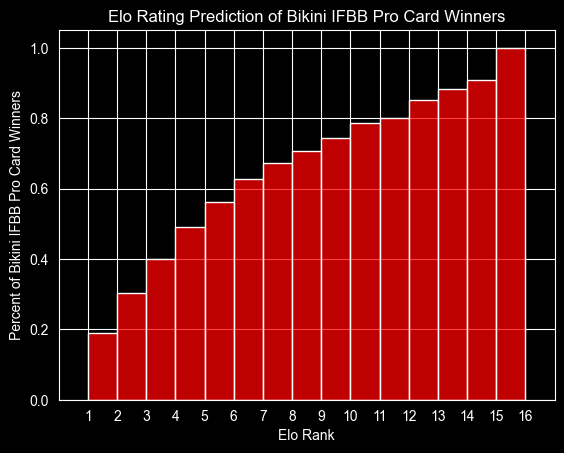

In [621]:
sns.histplot(df_am[(df_am["division"] == "bikini")
      & (df_am["year"] >= 2022)]["elo_rank"],
      bins=range(1, 17),
      stat='probability',
      cumulative=True
      )
plt.xlim(0, 17)
plt.xticks(range(1, 17))
plt.xlabel("Elo Rank")
plt.ylabel("Percent of Bikini IFBB Pro Card Winners")
plt.title("Elo Rating Prediction of Bikini IFBB Pro Card Winners")